In [1]:
import matplotlib.pyplot as plt
import numpy as np
import blip_analysis as ba
import pickle
from matplotlib.gridspec import GridSpec
from sklearn.metrics import confusion_matrix
import exp_blip_models as em
import matplotlib
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
import sys
sys.path.append('/home/camp/warnert/label_axes')
from label_axes import label_axes
import scipy
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

b


In [32]:
units_usrt1, units_usrt2, units_usrt3 = ba.load_usrts()
glyphs = ba.get_glyphs()
good_indexes = ba.get_stable_resp_indexes()
units_usrt1 = np.array(units_usrt1)[good_indexes]
units_usrt2 = np.array(units_usrt2)[good_indexes]
units_usrt3 = np.array(units_usrt3)[good_indexes]
mean_usrt1 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt1])
mean_usrt2 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt2])
mean_usrt3 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt3])

Found odour 1
Found odour 3
Found odour 5


In [13]:
dm1 = distance_matrix(np.mean(mean_usrt1, axis=-1).T, np.mean(mean_usrt1, axis=-1).T)
dm2 = distance_matrix(np.mean(mean_usrt2, axis=-1).T, np.mean(mean_usrt2, axis=-1).T)
dm3 = distance_matrix(np.mean(mean_usrt3, axis=-1).T, np.mean(mean_usrt3, axis=-1).T)

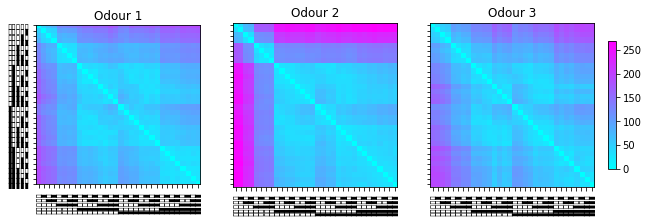

In [39]:

fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharex=True, sharey=True)
vmax = np.max([np.max(dm1), np.max(dm2), np.max(dm3)])

fs = 8

ax[0].imshow(dm1, vmax=vmax, cmap='cool')
ax[1].imshow(dm2, vmax=vmax, cmap='cool')
ax[2].imshow(dm3, vmax=vmax, cmap='cool')
pos = ax[2].get_position()
cbar_ax = fig.add_axes([0.92,pos.y0+0.05, 0.01, pos.height-0.1])
plt.colorbar(ax[2].images[0], cax=cbar_ax)
ax[0].set_yticks(range(32))
ax[0].set_yticklabels(glyphs, fontsize=fs)
ax[0].set_xticks(range(32))
ax[0].set_xticklabels(glyphs, rotation=90, fontsize=fs)
ax[1].set_xticks(range(32))
ax[1].set_xticklabels(glyphs, rotation=90, fontsize=fs)
ax[2].set_xticks(range(32))
ax[2].set_xticklabels(glyphs, rotation=90, fontsize=fs)
titles = ['Odour 1', 'Odour 2', 'Odour 3']
[ax[i].set_title(titles[i]) for i in range(3)]
plt.savefig('230703_dms.pdf', bbox_inches='tight')